In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 

In [ ]:
import pathlib
data_dir='/content/drive/MyDrive/ColabNotebooks/PNEUMONIA DATASET/chest_xray/test'
data_dir = pathlib.Path(data_dir)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/'My Drive/ColabNotebooks/PNEUMONIA DATASET'/

/content/drive/My Drive/ColabNotebooks/PNEUMONIA DATASET


In [ ]:
#Load the necessary libraries
import skimage.io
import matplotlib.pyplot as plt
from skimage import exposure

(-0.5, 1872.5, 1477.5, -0.5)

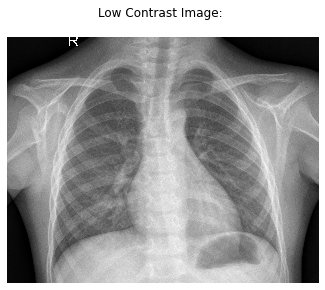

In [ ]:
#Load and display the image
low_contrast = skimage.io.imread(fname='/content/drive/MyDrive/ColabNotebooks/PNEUMONIA DATASET/chest_xray/test/NORMAL/IM-0010-0001.jpeg')
skimage.io.imshow(low_contrast)
plt.title("Low Contrast Image: \n")
plt.axis('off')

Text(0, 0.5, 'Number of Pixels')

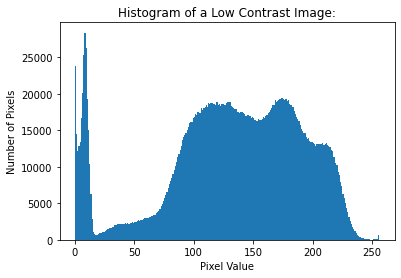

In [ ]:
plt.hist(low_contrast.flatten(), bins=256, range=(0,256))
plt.title('Histogram of a Low Contrast Image:')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')

Text(0.5, 1.0, 'Standard Histogram Equalization Applied Image')

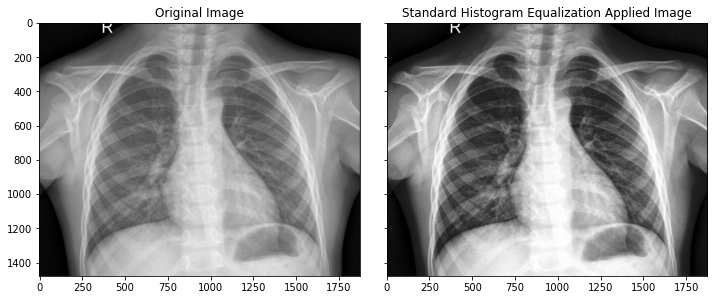

In [ ]:
#Apply Standard Equalization to the original image:
eq_image = exposure.equalize_hist(low_contrast)
#Plot the original and the equalized image together for comparison.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8), sharex=True, sharey=True)
fig.tight_layout()
ax1.imshow(low_contrast, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax2.imshow(eq_image, cmap=plt.cm.gray)
ax2.set_title('Standard Histogram Equalization Applied Image')

Text(0, 0.5, 'Number of Pixels')

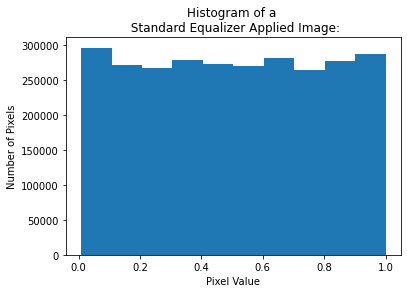

In [ ]:
plt.hist(eq_image.flatten())
plt.title('Histogram of a \n Standard Equalizer Applied Image:')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')

(-0.5, 1872.5, 1477.5, -0.5)

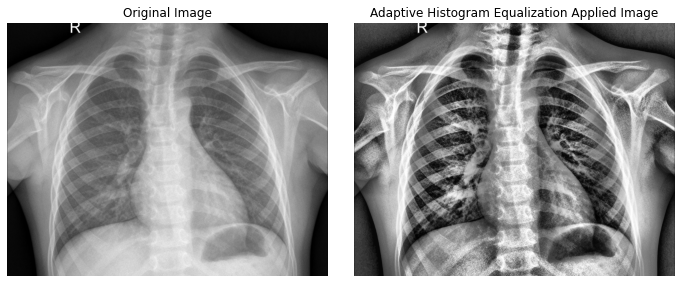

In [ ]:
#Apply Adaptive Histogram Equalization to the low contrast image: 
image_adapt = exposure.equalize_adapthist(low_contrast, clip_limit=0.03)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
fig.tight_layout()
ax1.imshow(low_contrast, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(image_adapt, cmap=plt.cm.gray)
ax2.set_title('Adaptive Histogram Equalization Applied Image')
ax2.axis('off')

Text(0, 0.5, 'Number of Pixels')

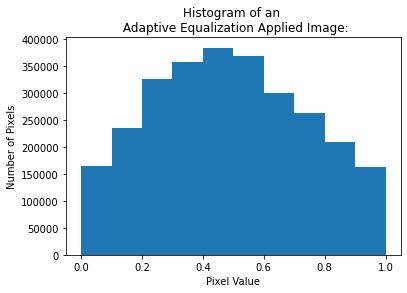

In [ ]:
plt.hist(image_adapt.flatten())
plt.title('Histogram of an \n Adaptive Equalization Applied Image:')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')

(-0.5, 1599.5, 1529.5, -0.5)

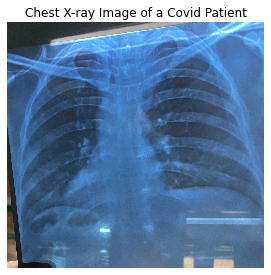

In [ ]:
#Load chest x-ray image
x_ray = skimage.io.imread('/content/drive/MyDrive/ColabNotebooks/PNEUMONIA DATASET/chest_xray/test/Real_Xray.jpg')
#Display the image
skimage.io.imshow(x_ray)
plt.title('Chest X-ray Image of a Covid Patient')
plt.axis('off')

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


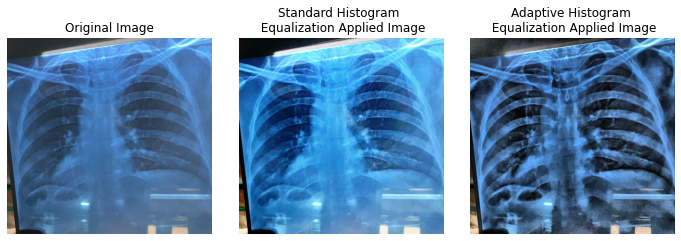

In [ ]:
#Apply standard and adaptive histogram equalization to an image:
def equalize_image(image):
    '''
        This function takes in an image, applies standard and adaptive 
        histogram equalizations to it and presents the results along with
        the original image for comparison purposes.
    '''
    #Apply standard equalization
    eq_image = exposure.equalize_hist(image)
    #Apply adaptive histogram equalization
    image_adapt = exposure.equalize_adapthist(image, clip_limit=0.03)
    #Plot the original and the equalized images together for comparison purposes.
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,8), sharex=True, sharey=True)
    fig.tight_layout()
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Original Image')
    ax1.axis('off')
    ax2.imshow(eq_image, cmap=plt.cm.gray)
    ax2.set_title('Standard Histogram \n Equalization Applied Image')
    ax2.axis('off') 
    ax3.imshow(image_adapt, cmap=plt.cm.gray)
    ax3.set_title('Adaptive Histogram \n Equalization Applied Image')
    ax3.axis('off') 
#Call the function with x-ray image:
equalize_image(x_ray)